Michelle Hui (msh334)
Sydney Wan ()

We are comparing two datasets against each other. One the Amazon Reviews dataset. Two, a dataset with market data on large beauty corporations. We performed collection and clean, data description, and exploratory data analysis on both datasets. We have tried our best to label and specify which datasets we are working on.

# Research Question
1. Are Amazon Beauty product reviews an accurate representation of how well a brand is doing in the greater market? Are we able to determine general consumer sentiment about a brand based on just Amazon reviews?

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Collection and Cleaning
## Beauty Market

Reading in the raw csv file

In [78]:
market_data_raw = pd.read_csv('beauty_market_sales.csv')

In [79]:
market_data_raw

,Unnamed: 0,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,"1,797.9",39.1,"1,815.0",38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,-
5,Subtotal,"3,857.4",84.0,"3,862.5",82.2,0.1,-1.8
6,Private label,49.5,1.1,56.2,1.2,13.6,0.1
7,Others,686.2,14.9,780.4,16.6,13.7,1.7


Renaming the weird column title to company

In [81]:
market_data = market_data_raw.rename(columns = {'Unnamed: 0' : "Company"})

Here we only are looking at the top 4 companies with clear company names, so we discard the 'Private label', 'Others', and 'Subtotal' rows

In [82]:
market_data = market_data.loc[0:4, :]
market_data

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,"1,797.9",39.1,"1,815.0",38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,-


Upon inspection, we see that the 2014 and 2015 sales in millions, as well as the share change percent columns are strings, not numerical data types. We hard code these columns and change them to floats so that we can perform statistical analysis on them

In [83]:
market_data.dtypes

Company                       object
2014_sales_millions           object
2014_market_share_percent    float64
2015_sales_millions           object
2015_market_share_percent    float64
sale_change_percent          float64
share_change_percent          object
dtype: object

In [84]:
market_data.loc[:, '2014_sales_millions'] = [1797.9, 954.7, 670.5, 262.3, 171.9]
market_data.loc[:, '2015_sales_millions'] = [1815.0, 946.1, 661.6, 263.8, 176]
market_data.loc[:, 'share_change_percent'] = [-0.5, -0.7, -0.5, -0.1, 0]

In [85]:
market_data.dtypes

Company                       object
2014_sales_millions          float64
2014_market_share_percent    float64
2015_sales_millions          float64
2015_market_share_percent    float64
sale_change_percent          float64
share_change_percent         float64
dtype: object

In [86]:
market_data

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


Our last step in cleaning this data is to save the newly cleaned data to a new csv file, which we then read in again so that we don't have to rerun the previous code next time we want to use this data.

In [87]:
market_data.to_csv('beauty_market_data.csv', index = False)

In [88]:
market_sales = pd.read_csv('beauty_market_data.csv')

In [89]:
market_sales

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


# Data Collection and Cleaning
## Amazon Reviews

In [2]:
beauty_raw = pd.read_csv('/Users/michellehui/info2950_project/amazon_reviews_us_Beauty_v1_00.tsv', sep = '\t', error_bad_lines=False)

b'Skipping line 10093: expected 15 fields, saw 22\nSkipping line 31965: expected 15 fields, saw 22\nSkipping line 49886: expected 15 fields, saw 22\nSkipping line 49905: expected 15 fields, saw 22\n'
b'Skipping line 67579: expected 15 fields, saw 22\nSkipping line 75367: expected 15 fields, saw 22\nSkipping line 92462: expected 15 fields, saw 22\nSkipping line 105041: expected 15 fields, saw 22\nSkipping line 109697: expected 15 fields, saw 22\nSkipping line 121931: expected 15 fields, saw 22\n'
b'Skipping line 139492: expected 15 fields, saw 22\nSkipping line 158729: expected 15 fields, saw 22\nSkipping line 165784: expected 15 fields, saw 22\nSkipping line 176996: expected 15 fields, saw 22\nSkipping line 182928: expected 15 fields, saw 22\nSkipping line 195841: expected 15 fields, saw 22\n'
b'Skipping line 196938: expected 15 fields, saw 22\nSkipping line 202535: expected 15 fields, saw 22\nSkipping line 261147: expected 15 fields, saw 22\n'
b'Skipping line 265777: expected 15 field

b'Skipping line 1979093: expected 15 fields, saw 22\nSkipping line 1982997: expected 15 fields, saw 22\nSkipping line 1992924: expected 15 fields, saw 22\nSkipping line 1996161: expected 15 fields, saw 22\nSkipping line 2003175: expected 15 fields, saw 22\nSkipping line 2024153: expected 15 fields, saw 22\nSkipping line 2026345: expected 15 fields, saw 22\n'
b'Skipping line 2041159: expected 15 fields, saw 22\nSkipping line 2042954: expected 15 fields, saw 22\nSkipping line 2044244: expected 15 fields, saw 22\nSkipping line 2047949: expected 15 fields, saw 22\nSkipping line 2051022: expected 15 fields, saw 22\nSkipping line 2052365: expected 15 fields, saw 22\nSkipping line 2064460: expected 15 fields, saw 22\nSkipping line 2077010: expected 15 fields, saw 22\nSkipping line 2083893: expected 15 fields, saw 22\n'
b'Skipping line 2097514: expected 15 fields, saw 22\nSkipping line 2100479: expected 15 fields, saw 22\nSkipping line 2103183: expected 15 fields, saw 22\nSkipping line 2108608

In [3]:
beauty_raw.to_csv('amazonreviews_beauty_raw.csv',index=False)

In [4]:
beauty_raw = pd.read_csv('amazonreviews_beauty_raw.csv')

In [5]:
beauty = beauty_raw.copy()

Here we converted the review date to datetime type. When then kept only the reviews written in 2015, which is the most recent year in the dataset. We chose 2015 so that we are able to compare against our 2015 market share data.

In [6]:
# keeping reviews written in 2015
beauty['review_date'] = pd.to_datetime(beauty['review_date'])
beauty = beauty.loc[beauty['review_date'].dt.year == 2015]

As Amazon sells many smaller, indie brands, we are filtering for the select corporate brands that we will be analyzing. The five leading companies we will be looking at are L'oreal, Coty, Revlon, Johnson and Johnson, and Proctor and Gamble. We are including the leading brands that they own as additional brands to filter for.

In [7]:
loreal = ["L'oreal", 'Garnier', 'Maybelline', 'Nyx', 'Cerave']
coty = ['Rimmel', 'Covergirl', 'Sally Hansen']
revlon = ['Revlon', 'Almay']
jnj = ['Clean & Clear', 'Neutrogena', 'Aveeno', 'OGX', 'Lubriderm'] 
png = ['Olay','Herbal Essences', 'Pantene', 'Head and Shoulders','Aussie']
brands = loreal + coty + revlon + jnj
beauty = beauty.loc[beauty['product_title'].str.contains('|'.join(brands))]

In [23]:
# add columns by parent corporation
beauty.loc[beauty['product_title'].str.contains('|'.join(loreal)), 'corporation'] = "L'oreal"
beauty.loc[beauty['product_title'].str.contains('|'.join(coty)), 'corporation'] = "Coty"
beauty.loc[beauty['product_title'].str.contains('|'.join(revlon)), 'corporation'] = "Revlon"
beauty.loc[beauty['product_title'].str.contains('|'.join(jnj)), 'corporation'] = "Johnson & Johnson"
beauty.loc[beauty['product_title'].str.contains('|'.join(png)), 'corporation'] = "Proctor & Gamble"
beauty.corporation.value_counts()

L'oreal              14664
Johnson & Johnson    11005
Revlon                8955
Coty                  5278
Proctor & Gamble        98
Name: corporation, dtype: int64

In order to narrow the dataset down to a more reasonable size, we are randomly selecting 40,000 observations. We then reset the index on each dataset to be from 0-39,999.

In [9]:
# randomly narrowing down to 40,000
beauty = beauty.sample(n=40000).reset_index()

Here we are dropping the unecessary columns.
 - We first dropped the Marketplace column because all the products were sold in the US.
 - We also dropped the index column as we reset the index. 
 - We dropped product_category as all products fall into Beauty
 - total_votes is the same as helpful_votes and is redundant

In [10]:
# dropping marketplace, index column, product category, total votes
beauty = beauty.drop(columns= ['marketplace','index','product_category', 'total_votes'], axis=1)

In [11]:
# downloading cleaned csv file
beauty.to_csv('amazonreviews_beauty.csv',index=False)

# Data Description

## Beauty Market
### Motivation
- **Why was this dataset created?**
    - This dataset was created to explore how the market of cosmetics has evolved through the year or 2015, in regards to trends in sales, market breakdown, which factors contributed to these changes, and which makeup trends might affect the market.
    
- **Who funded the creation of the dataset? **
    - The research was done by Mintel, an independent market analysis company that prides itself on supplying objective information on a whole range of markets and marketing issues.
    
### Composition
- **What are the observations (rows) and the attributes (columns)? **
    - The rows are the top cosmetics companies, and the columns are how they performed in the market, specifically: company name, 2014 sales (in millions of dollars), 2014 market share percentage, 2015 sales (in millions of dollars), 2015 market share percentage, the sale change percentage from 2014-2015, and the market share percent change from 2014-2015.
    
- **How many instances are there in the dataset? Does it contain all possible instances or is it a sample? What processes might have influenced what data was observed and recorded and what was not?**
    - The initial dataset had 7 instances, but I removed the "private labels" and "other" companies as they are not easy to use with our Amazon dataset. The data contained a note that read: "Data may not equal totals due to rounding The above figures are based on MULO sales data from Information Resources, Inc., InfoScan Reviews. MULO is defined as Multi Outlet, representative of the following channels: total U.S. Grocery, Mass, Total U.S. Drug, Total Walmart, Dollar, Military, and Club." 
    
- **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**
    - Our data can be found at the same Google Drive as previously listed.
    
- **Is the data self contained or does it rely on other outside websites?**
    - Our data is self contained because it is historical data about sales in 2015, and thus would not rely on outside websites
    
- **Does this data relate to individuals? Can the individuals be identified? Are there any subpopulations that can be identified?**
    - No, the data is not related to individuals, but companies which are entities.
    
### Collection Process
- **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
    - No people were involved, as the data in this specific dataset was from an Information Resrouces company.
    
- **What time frame was the data collected?**
    - This dataset focuses on company sales from 2014 to March 22, 2015.
    
### Preprocessing
- **What preprocessing was done, and how did the data come to be in the form that you are using?**
    - Refer to data cleaning appendix.
    
- **Are there are any errors, sources of noise, or redundancies in the data?**
    - None that are visible to us. The dataset is rather small and informs us of overarching/summarizing statistics, thus there is not much room for errors/noise.
 
### Uses
    
 - **Has this data been used before? If so, what for?**
     - There is no evidence that this data has been used before, however it is very likely that it has considering it is a public dataset published for people to use.

## Amazon Reviews

### Motivation
 - **Why was this dataset created?**
     - This dataset was intended to facilitate public study into the properties of Amazon customer reviews including how consumers evolve, express, and evaluate Amazon products.
 
 - **Who funded the creation of the dataset?**
     - Amazon funded and collected this Amazon Customer Reviews Product for public use. The information is publicly available on Amazon Web Services.

### Composition
  - **What are the observations (rows) and the attributes (columns)?**
      - The observations consist of each individual review. Each review has the following column attributes: customer_id, review_id, product_id, product_title, star_rating (Scale of 1-5), helpful_votes, vine (Amazon invites select credible users to review products through their Vine program), verified_purchase, review_headline, review_body, and review_date.
  
 - **How many instances are there in the dataset? Does it contain all possible instances or is it a sample? What processes might have influenced what data was observed and recorded and what was not?**
     - There are a total of 40,000 observations. The original dataset with over a million reviews in the beauty category is a sample collected by Amazon. Amazon constructed this dataset hoping to represent a sample of different customer opinions and demographics. We then narrowed the dataset even further by most recent year and then by select brands leading the beauty/hair care industry. 
 
 - **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**
     - The raw source can be found on Amazon Web Services. Here is the link to raw datasets also uploaded on google drive: https://drive.google.com/drive/folders/1F1Z1ERhp18uaB9J1d-dkGYhBCbJnPyXC?usp=sharing
 
 - **Is the data self contained or does it rely on other outside websites?**
     - The data is self-contained in a downloaded tsv file.
 
 - **Does this data relate to individuals? Can the individuals be identified? Are there any subpopulations that can be identified?**
     - Each individual review is associated to a reviewer through customer_id. However, there is no further information about this individual and customers cannot be split off into smaller subpopulations by demographics.
 
### Collection Process
 - **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
     - The reviewers in the dataset are not aware of their reviews being used for this purpose. They gave their consent to Amazon when they published their reviews publicly on Amazon. 
 
 - **What time frame was the data collected?**
     - Amazon collected reviews starting from 1995 all the way to 2015. 
 
### Preprocessing
 - **What preprocessing was done, and how did the data come to be in the form that you are using?**
     - We conducted filtering on certain column values by year and product brand. We then randomly selected 40,000 observations to narrow down the size of our dataset.
 
  - **Are there are any errors, sources of noise, or redundancies in the data?**
      - There were some observations with additional attributes/columns when parsing in the data from a csv file. We handled this by skipping over these lines and not including in the final dataset as it would not be reasonable to comb through the millions of reviews to individually handle each of these errors.
 
### Uses
 - **Has this data been used before? If so, what for?**
     - There are no public publishings using this dataset that could be found. However, we found a few other Amazon review analysis using other Amazon datasets. These analyses consisted mainly of review sentiment analysis. 

# Data Limitations


## Beauty Market
- We are only able to see the market sales of 4 well known companies, some of which are parent companies that own several beauty brands. This makes it difficult to use with our Amazon dataset which reports reviews of these smaller "child" companies. 
- The data lumps together "private labels" and "others" into separate categories, which is unclear of which companies it considers under those categories, and might have been valuable in our data analysis.
- The data only reports sales and shares for 2015 as a whole, and in the period ending March 22. Not only does this mean it does not include the whole year of 2015, but it is not specific in how the sales were in different months.
- The data only analyzes company performance in terms of market shares and sales, no other metrics.

## Amazon Reviews
 - Amazon has a lot of other smaller, indie brands that we had to exclude from the cleaned dataset because the Beauty Market Dataset only included the top few brands. Because we are not including them, our analysis might not accurately reflect the whole market share and beauty space.
 - It could be difficult to analyze the review text content as it requires in-depth natural language processing, which is beyond the scope of what we will learn in this course. 
 - By selecting only 40,000 reviews, we also risk losing a lot of important observations such as vine reviews, reviews that are voted highly helpful, and various reviews across products that could have very beneficial content.
 - Some corporations do not have as many observations as others. Additionally some have zero vine reviews. 
 - Our data is only looking 2015 reviews, which might not be relevant to the current market today.

# Exploratory Data Analysis

## Beauty Market

In [90]:
market_sales

,Company,2014_sales_millions,2014_market_share_percent,2015_sales_millions,2015_market_share_percent,sale_change_percent,share_change_percent
0,L'Oréal USA,1797.9,39.1,1815.0,38.6,1.0,-0.5
1,Procter & Gamble,954.7,20.8,946.1,20.1,-0.9,-0.7
2,Revlon Inc.,670.5,14.6,661.6,14.1,-1.3,-0.5
3,Coty Beauty,262.3,5.7,263.8,5.6,0.5,-0.1
4,Johnson & Johnson,171.9,3.7,176.0,3.7,2.4,0.0


Now we will compare the sales between 2014-2015 by company, as well as their sales/share percentage change.

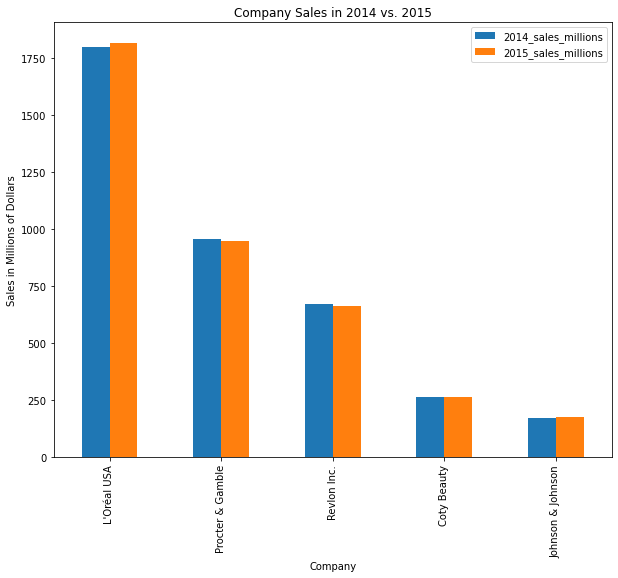

In [91]:
market_sales.plot(x = "Company", y= ['2014_sales_millions', '2015_sales_millions'], kind = 'bar', legend = True, figsize = (10, 8))
plt.ylabel("Sales in Millions of Dollars")
plt.title("Company Sales in 2014 vs. 2015")
plt.show()

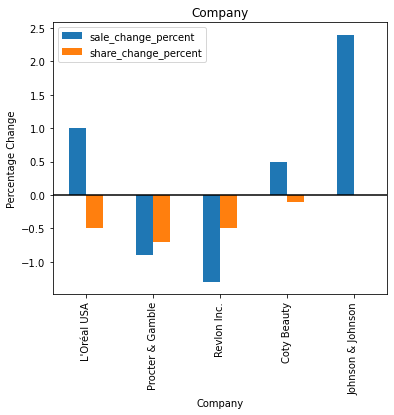

In [92]:
market_sales.plot(x = "Company", y= ['sale_change_percent', 'share_change_percent'], kind = 'bar', legend = True, figsize = (6, 5))
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel("Percentage Change")
plt.title("Company")
plt.show()

Here we see some interesting data. While the sale change percent grew for L'Oreal and Coty Beauty, their share percentages declined. Additionally, Johnson & Johnson sale percentage grew far more than any other company. It is also noteable that J&J's share percentage did not change at all. Another interesting observation is that while J&J had the largest sales percentage increase, their overall sales still remained the lowest in terms of millions of dollars.

## Amazon
 Sydney:
 - histogram of star ratings by parent company vs overall distribution
     - summary statistics: mean, median, standard deviation
 - historgram of review length by parent company vs overall distribution
     - summary statistics
 - correlation between review length and star ratings
     - correlation coefficients
 - market share graphs
 - writing 
     
 Michelle:    
 - bar chart (bins of helpful votes) to see distribution of helpful votes
 - percentage of verified purchases, vine reviews by parent company
     - correlation between verified purchases and helpful votes
     - correlation between vine and helpful votes
 - distribution of vine, verified purchases, etc. ratings compare
 - markdown and cleaning of data

In [93]:
# importing cleaned amazon review datasets
beauty_clean = pd.read_csv('amazonreviews_beauty.csv')

In [94]:
beauty_clean.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,vine,verified_purchase,review_headline,review_body,review_date,corporation
0,24767754,R1XFL3Z2OT99W8,B003LSZHQ0,192111987,"Revlon Beyond Natural Blush & Bronzer, Peach (...",3.0,0.0,N,Y,Three Stars,This blush and bronzer was no big deal. It's ...,2015-06-10,Revlon
1,28040275,R3AKWI2QG78Y6W,B00A9KBHR6,533375687,Exclusive By Revlon Crazy Shine Nail Buffer # ...,5.0,0.0,N,Y,These make your natural nails so shiny. The gr...,These make your natural nails so shiny. The g...,2015-08-28,Revlon
2,34986371,R1UU0O9IDQAJ90,B001DPMETG,105754500,Garnier SkinActive Clearly Brighter Anti-Puff ...,5.0,1.0,N,Y,This works well because it lets me massage awa...,This works well because it lets me massage awa...,2015-07-23,L'oreal
3,36407464,R1XQ88PJ7HPGYQ,B00113HO90,78786137,Neutrogena Rainbath Refreshing Shower and Bath...,5.0,0.0,N,Y,Neutrogena Rocks!!,Awesome products!!,2015-05-25,Johnson & Johnson
4,889672,R1YLPTSI256CM6,B004Y9H1QO,511887159,Maybelline New York Baby Lips Moisturizing Lip...,5.0,0.0,N,Y,Five Stars,ok,2015-02-07,L'oreal


### Histograms of Star Rating Distribution Overall and by Company

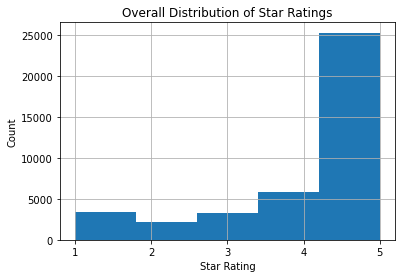

In [95]:
beauty_clean.star_rating.hist(bins = 5)
plt.xticks(range(1, 6))
plt.xlabel('Star Rating')
plt.ylabel("Count")
plt.title("Overall Distribution of Star Ratings")
plt.show()

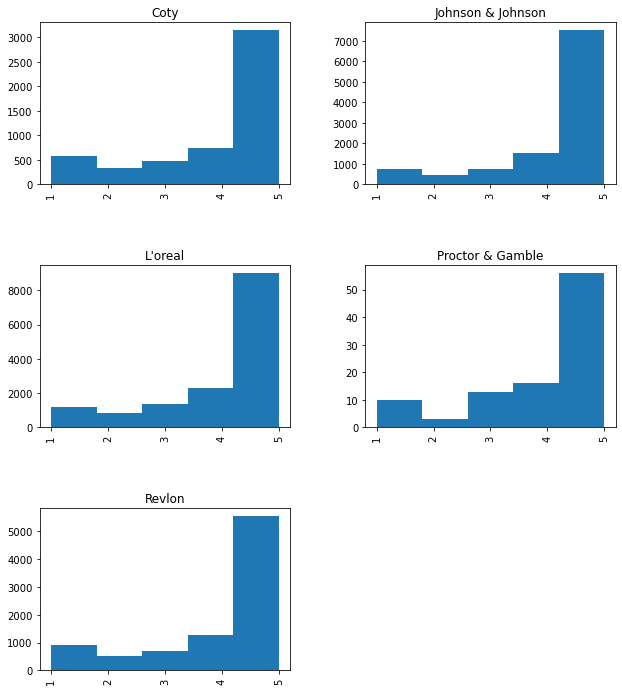

In [77]:
beauty_clean.star_rating.hist(by=beauty_clean.corporation, figsize = (10, 12), bins = 5)
plt.title('Distribution of Star Ratings by Company')
plt.show()

### Basic Statistics of Star Ratings by Corporation

#### All Companies

In [96]:
beauty_clean[['star_rating']].agg([np.mean, np.median, np.std, np.var])

,star_rating
mean,4.184950
median,5.000000
std,1.290905
var,1.666435


#### Breakdown by Company

In [97]:
beauty_clean.groupby('corporation')['star_rating'].agg([np.mean, np.median, np.std, np.var])

,mean,median,std,var
corporation,,,,
Coty,4.050777,5.0,1.386499,1.922379
Johnson & Johnson,4.323308,5.0,1.198936,1.437447
L'oreal,4.170827,5.0,1.272123,1.618296
Proctor & Gamble,4.071429,5.0,1.325795,1.757732
Revlon,4.118370,5.0,1.355196,1.836557


In [98]:
beauty_clean['review_length'] = beauty_clean['review_body'].str.len()

In [100]:
beauty_clean.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,vine,verified_purchase,review_headline,review_body,review_date,corporation,review_length
0,24767754,R1XFL3Z2OT99W8,B003LSZHQ0,192111987,"Revlon Beyond Natural Blush & Bronzer, Peach (...",3.0,0.0,N,Y,Three Stars,This blush and bronzer was no big deal. It's ...,2015-06-10,Revlon,72.0
1,28040275,R3AKWI2QG78Y6W,B00A9KBHR6,533375687,Exclusive By Revlon Crazy Shine Nail Buffer # ...,5.0,0.0,N,Y,These make your natural nails so shiny. The gr...,These make your natural nails so shiny. The g...,2015-08-28,Revlon,189.0
2,34986371,R1UU0O9IDQAJ90,B001DPMETG,105754500,Garnier SkinActive Clearly Brighter Anti-Puff ...,5.0,1.0,N,Y,This works well because it lets me massage awa...,This works well because it lets me massage awa...,2015-07-23,L'oreal,119.0
3,36407464,R1XQ88PJ7HPGYQ,B00113HO90,78786137,Neutrogena Rainbath Refreshing Shower and Bath...,5.0,0.0,N,Y,Neutrogena Rocks!!,Awesome products!!,2015-05-25,Johnson & Johnson,18.0
4,889672,R1YLPTSI256CM6,B004Y9H1QO,511887159,Maybelline New York Baby Lips Moisturizing Lip...,5.0,0.0,N,Y,Five Stars,ok,2015-02-07,L'oreal,2.0


### Review Body Length Analysis

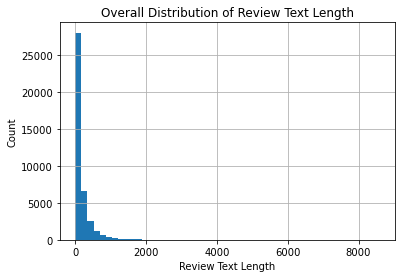

In [101]:
beauty_clean.review_length.hist(bins=50)
plt.xlabel('Review Text Length')
plt.ylabel("Count")
plt.title("Overall Distribution of Review Text Length")
plt.show()

In [102]:
len(beauty_clean[beauty_clean['review_length'] > 2000])

68

Looking at the overall review text distribution, we see that most reviews are less than 2000 characters, but the chart is being skewed by 68 observations. Let's take a look at this histogram when we only consider the reviews with less than 2000 characters.

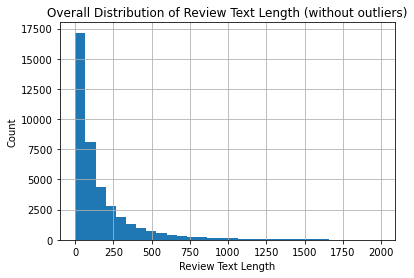

In [103]:
beauty_clean[beauty_clean['review_length'] < 2000].review_length.hist(bins=30)
plt.xlabel('Review Text Length')
plt.ylabel("Count")
plt.title("Overall Distribution of Review Text Length (without outliers)")
plt.show()

Looking at this histogram, we still see that most reviews are 250 words or less.

Now analyzing review length by distribution, we will also only look at reviews with 1000 characters or less separately.

### Histograms of Review Text Lengths of Reviews with <1000 Characters

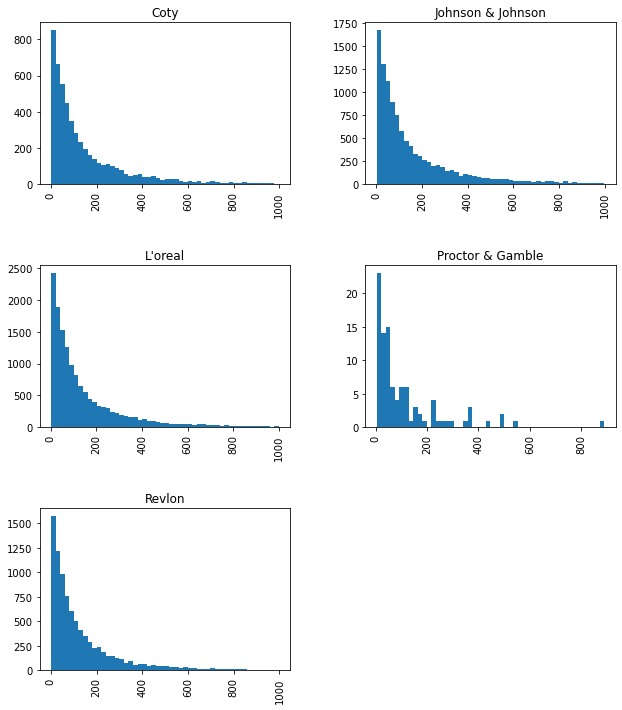

In [104]:
beauty_clean[beauty_clean['review_length'] < 1000].review_length.hist(by=beauty_clean.corporation, figsize = (10, 12), bins = 50)
plt.show()

### Examining the Correlation Between Review Length & Star Rating

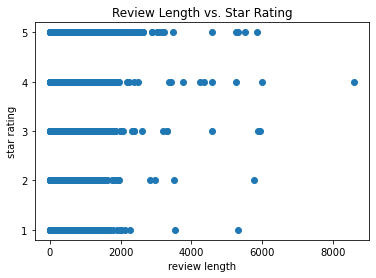

In [105]:
plt.scatter(beauty_clean['review_length'], beauty_clean['star_rating'])
plt.yticks(range(1, 6)) #only include ticks for the whole numbers of the star ratings
plt.xlabel("review length")
plt.ylabel('star rating')
plt.title('Review Length vs. Star Rating')
plt.show()

In [106]:
beauty_clean['review_length'].corr(beauty_clean['star_rating'])

-0.10873734795964711

Based on the graph and correlation coefficient, there is virtually no correlation between review length and star ratings. This is contrary to our prediction that longer reviews might indicate extremely positive/negative ratings.

### Distribution of Helpful Votes

In [107]:
# subsetting reviews by corporation
loreal_reviews = beauty_clean[beauty_clean['corporation']=="L'oreal"]
coty_reviews = beauty_clean[beauty_clean['corporation']=="Coty"]
revlon_reviews = beauty_clean[beauty_clean['corporation']=="Revlon"]
jnj_reviews = beauty_clean[beauty_clean['corporation']=="Johnson & Johnson"]
png_reviews = beauty_clean[beauty_clean['corporation']=="Proctor & Gamble"]

0.0      30921
1.0       5371
2.0       1540
3.0        702
4.0        360
         ...  
193.0        1
377.0        1
363.0        1
135.0        1
58.0         1
Name: helpful_votes, Length: 104, dtype: int64

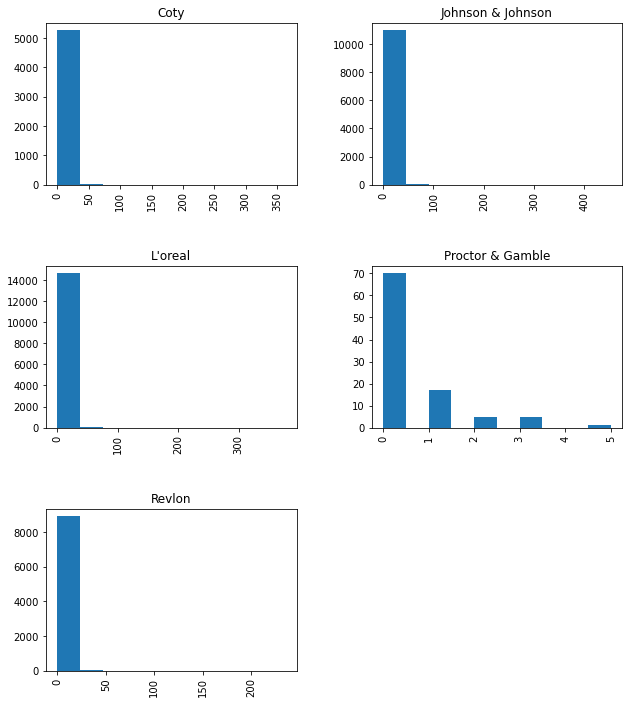

In [111]:
# plotting distribution of helpful votes
beauty_clean['helpful_votes'].hist(by=beauty_clean.corporation, figsize = (10, 12))
plt.title('Distribution of Helpful Votes')

beauty_clean['helpful_votes'].value_counts()

As we can see, there are a lot of reviews with zero helpful votes and only a few reviews with many helpfu votes. When the distribution is plotted out, it is very hard to analyze the graph and not much can be taken away. I will be applying square root transformation to the graphs in an attempt to reduce the range.

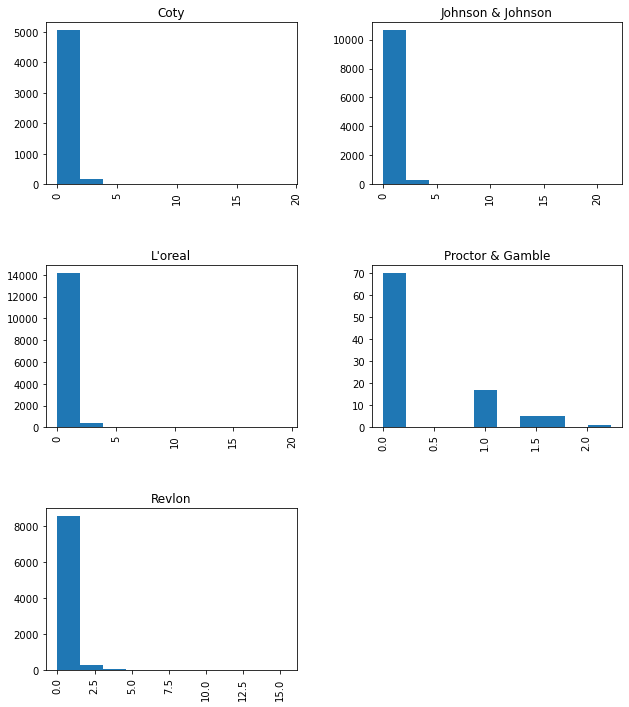

In [113]:
# square root transformed graphs 
beauty_clean['helpful_votes'].apply(np.sqrt).hist(by=beauty_clean.corporation, figsize = (10, 12))
plt.title('TransformedDistribution of Helpful Votes')
plt.show()

Unfortunately, there is still an extremely strong right skew in helpful votes. It is also not possible to apply log transform to this dataset as a lot of the values are zero.

### Analyzing Verified Purchases and Vine Reviews by Company

#### Percentages of Verified Purchases and Vine Reviews

In [66]:
brand_reviews = [loreal_reviews, coty_reviews, revlon_reviews, jnj_reviews, png_reviews]

vine_percent = [len(brand[brand['vine']=='Y'])/len(brand)*100 for brand in brand_reviews]
vine_counts = [len(brand[brand['vine']=='Y']) for brand in brand_reviews]

ver_percent = [len(brand[brand['verified_purchase']=='Y'])/len(brand)*100 for brand in brand_reviews]
ver_counts = [len(brand[brand['verified_purchase']=='Y']) for brand in brand_reviews]

total = [len(brand) for brand in brand_reviews]

percentile = pd.DataFrame({
    'brand':["L'oreal", 'Coty', 'Revlon', 'Johnson & Johnson', 'Proctor & Gamble'],
    'vine_percent':vine_percent,
    'vine_counts':vine_counts,
    'verified_percent':ver_percent,
    'verified_counts':ver_counts,
    'total':total
})
percentile

,brand,vine_percent,vine_counts,verified_percent,verified_counts,total
0,L'oreal,1.077469,158,86.749864,12721,14664
1,Coty,0.000000,0,86.926866,4588,5278
2,Revlon,0.469012,42,91.647125,8207,8955
3,Johnson & Johnson,1.999091,220,84.334393,9281,11005
4,Proctor & Gamble,0.000000,0,97.959184,96,98


#### Relationship between Helpful Votes and Verified Purchases

verified_purchase  corporation      
N                  Coty                 2.868116
                   Johnson & Johnson    1.582947
                   L'oreal              2.019557
                   Proctor & Gamble     1.000000
                   Revlon               2.578877
Y                  Coty                 0.661726
                   Johnson & Johnson    0.719211
                   L'oreal              0.661976
                   Proctor & Gamble     0.468750
                   Revlon               0.587060
Name: helpful_votes, dtype: float64

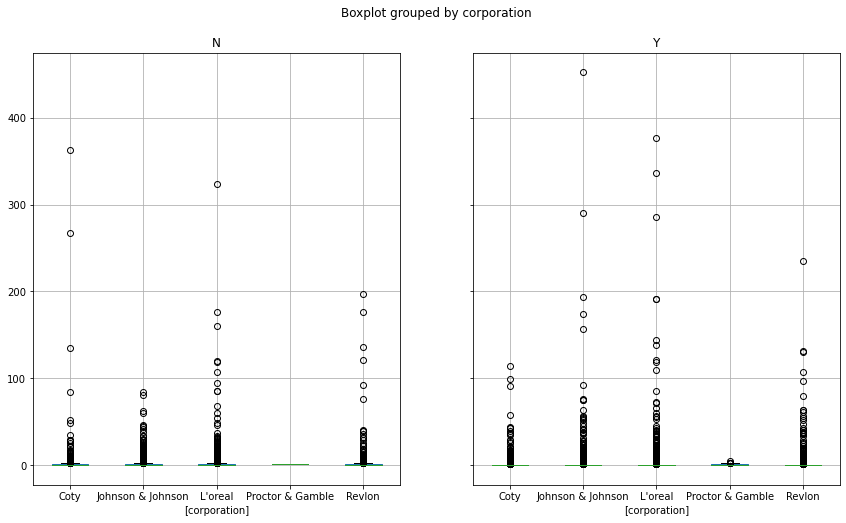

In [141]:
# boxplot
beauty_clean.groupby(['verified_purchase']).boxplot(column=['helpful_votes'], by=['corporation'], figsize = (14, 8))
# how to add labels to grouped chart?

# summary statistics: mean
beauty_clean.groupby(['verified_purchase','corporation'])['helpful_votes'].mean()

#### Verfied Purchases and Star Ratings

verified_purchase  corporation      
N                  Coty                 3.636232
                   Johnson & Johnson    3.852088
                   L'oreal              3.722594
                   Proctor & Gamble     5.000000
                   Revlon               3.534759
Y                  Coty                 4.113121
                   Johnson & Johnson    4.410839
                   L'oreal              4.239289
                   Proctor & Gamble     4.052083
                   Revlon               4.171561
Name: star_rating, dtype: float64

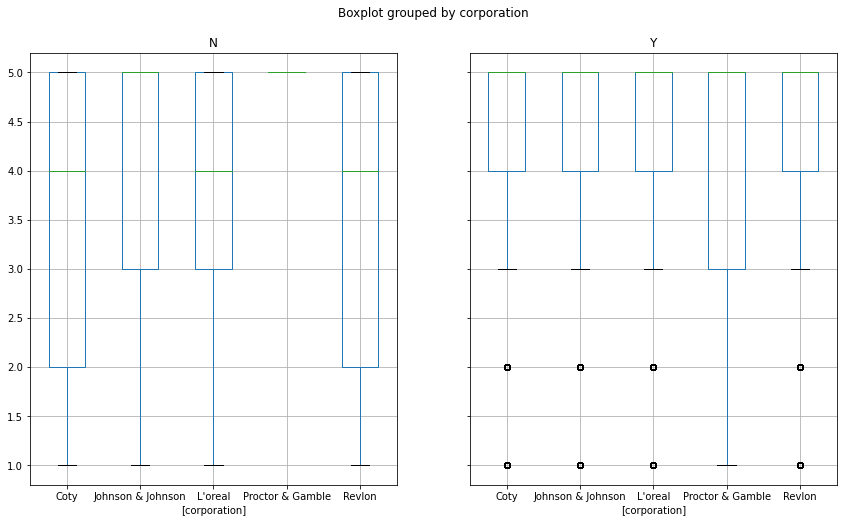

In [145]:
# boxplot
beauty_clean.groupby(['verified_purchase']).boxplot(column=['star_rating'], by=['corporation'], figsize = (14, 8))
# how to add labels to grouped chart?

# summary statistics: mean
beauty_clean.groupby(['verified_purchase','corporation'])['star_rating'].mean()

# Question for Reviewers
1. Are we able to make predictions from observed trends in the Amazon beauty reviews? If so, what types of predictions will we be able to reliably make?
2. Should we attempt to conduct natural language processing/sentiment analysis on the review text? Will that be beyond our capabilities as introductory students.
3. Should we expand on into new product categories/corporations to get a more well-rounded overview of consumer review trends?
4. Is it concerning that there doesn't seem to be any clear differences in review trends between corporations? Should we and is it possible to pivot our project?